# <center>R Capstone Project Cyclist</center>

 **Task Question: How do annual members and casual riders use Cyclistic bikes differently?**
 
For the data analysis, I decided to use R because the data is too large for Google Spreadsheets or Microsoft Excel.

## I. Prepare: A description of all data sources used

- The data has been made available by Motivate International Inc.(Secondary data) https://divvy-tripdata.s3.amazonaws.com/index.html  
- There are no issues with the credibility of the data because the data comes from a trustworthy source, in this case, the company Lyft Bikes and Scooters, LLC (“Bikeshare”) which shares its data for study purposes. 
- Privacy is respected. The customer's IDs are not shared with the public. 
- This data seems to be reliable, original, comprehensive, current, or cited. 
- I will use 12 data files, one file for each month from August 2022 to July 2023 (there are more data files, however, the assignment was exclusive for this period of time)
- Each file has the same column names, which are:

| Column Name        | Description                                        |
|--------------------|----------------------------------------------------|
| ride_id            | Unique ID for each ride                            |
| rideable_type      | The type of ride used                              |
| started_at         | The starting date and time of the ride             |
| ended_at           | The ending date and time of the ride               |
| start_station_name | The starting location of the ride                  |
| start_station_id   | The ID of the station where the ride started       |
| end_station_name   | The ending location of the ride                    |
| end_station_id     | The ID of the station where the ride ended         |
| start_lat          | The latitude (position) of the starting point      |
| start_lng          | The longitude (position) of the starting point     |
| end_lat            | The latitude (position) of the ending point        |
| end_lng            | The longitude (position) of the ending point       |
| member_casual      | Member or casual rider                             |


**Note:** no metadata about the files were found. The description of each column was made according to its values


### 1. Reading the CSV and creating Data Frames

In [ ]:
# loading the necessary packages
# The corresponding packages were already installed
library(tidyverse)
library(readr)

In [ ]:
# read the CSV files and create data frames
August_2022 <- read_csv("data/202208-divvy-tripdata.csv")
September_2022 <- read_csv("data/202209-divvy-tripdata.csv")
October_2022 <- read_csv("data/202210-divvy-tripdata.csv")
November_2022 <- read_csv("data/202211-divvy-tripdata.csv")
December_2022 <- read_csv("data/202212-divvy-tripdata.csv")
January_2023 <- read_csv("data/202301-divvy-tripdata.csv")
February_2023 <- read_csv("data/202302-divvy-tripdata.csv")
March_2023 <- read_csv("data/202303-divvy-tripdata.csv")
April_2023 <- read_csv("data/202304-divvy-tripdata.csv")
May_2023 <- read_csv("data/202305-divvy-tripdata.csv")
June_2023 <- read_csv("data/202306-divvy-tripdata.csv")
July_2023 <- read_csv("data/202307-divvy-tripdata.csv")

### 2. Check if all 12 data sets are saved for the analysis.

In [3]:
# control if all 12 data sets are saved for the analysis
objects <- ls()# Count the number of data sets
dataset_count <- sum(sapply(objects, function(obj) is.data.frame(get(obj))))
                            
# Print the count
cat("Number of datasets:", dataset_count, "\n")

Number of datasets: 12 


## II. Process: Documentation of any cleaning or manipulation of data


### 1.  Checking if each data frame has the same column names and if the classes of these match

In [5]:
# 1.  before merging data - I compared if the data frames have the same column names and that the classes of these match
# Loading the necessary packages 
library(skimr)
library(janitor)
compare_df_cols_same(August_2022, September_2022,October_2022, November_2022, December_2022, January_2023,February_2023, March_2023, April_2023, May_2023, June_2023, July_2023 )
## True means here that the column are named equal and the type of variable are equal between columns

[1] TRUE

- In this case, TRUE means that all data sets have the same column names

### 2. Merging/joining the rows of the 12 data frames

In [6]:
# 2. merging/joining the rows of the 12 data frames 

Cyclist_merged<- bind_rows(August_2022, September_2022, October_2022, November_2022, December_2022, January_2023,February_2023, March_2023, April_2023, May_2023, June_2023, July_2023)

- "Now, I will only work with the data set 'Cyclist_merged.' This new data frame contains the information from the 12 data frames I created before. Therefore, I will remove these data frames to save space in the kernel.

In [7]:
# removing the 12 created data franes for saving space in the Kernel
rm(August_2022, September_2022, October_2022, November_2022, December_2022, January_2023,February_2023, March_2023, April_2023, May_2023, June_2023, July_2023)

### 3. Checking for duplicates

In [8]:
# 3. checking for duplicate data- in this case in the column "ride_id"

# Checking forduplicates in the "ride_id" column
duplicates <- Cyclist_merged[duplicated(Cyclist_merged$ride_id), ]
# View the rows with duplicate ride_id values
print(duplicates)


# A tibble: 0 × 13
# ℹ 13 variables: ride_id <chr>, rideable_type <chr>, started_at <dttm>,
#   ended_at <dttm>, start_station_name <chr>, start_station_id <chr>,
#   end_station_name <chr>, end_station_id <chr>, start_lat <dbl>,
#   start_lng <dbl>, end_lat <dbl>, end_lng <dbl>, member_casual <chr>


- I checked for duplicate data in the column 'ride_id' because this should be unique for each row.The results showed that there are no duplicated ride IDs, as the table has zero rows.

In [9]:
# Checking the number of observations, which, in this case, corresponds to the count of unique ride_ids.

summary(Cyclist_merged$ride_id)

   Length     Class      Mode 
  5723606 character character 

- We have a total of 5,723,606 records.

### 4. Checking for missing values

In [10]:
# 4. checking for missing values

missing_counts <- colSums(is.na(Cyclist_merged))##to see missing values per column
missing_counts_df <- data.frame(Column = names(missing_counts), Missing_Count = missing_counts)## to see it in a table
missing_counts_df

,Column,Missing_Count
,<chr>,<dbl>
ride_id,ride_id,0
rideable_type,rideable_type,0
started_at,started_at,0
ended_at,ended_at,0
start_station_name,start_station_name,868772
start_station_id,start_station_id,868904
end_station_name,end_station_name,925008
end_station_id,end_station_id,925149
start_lat,start_lat,0


- Missing values were found for the columns 'start_station_name,' 'start_station_id,' 'end_station_name,' 'end_station_id,' 'end_lat,' and 'end_long.
- I chose to remove missing values from the dataset for several reasons. Firstly, the dataset is substantial, consisting of 5,723,606 records. Secondly, the missing values were distributed randomly across the dataset, and there was no discernible pattern or bias in their occurrence. Therefore, removing them ensures that my analysis is based on complete and reliable data, allowing me to draw meaningful and accurate conclusions without compromising the integrity of the results.

### 5. Removing missing values.

In [11]:
# 5. removing missing values.
# I decided to remove the rows with missing values
Cyclist_merged <- na.omit(Cyclist_merged)

### 6. Checking results after cleaning data

In [12]:
# 6. checking results after cleaning data

missing_counts <- colSums(is.na(Cyclist_merged))##to see missing values per column
missing_counts_df <- data.frame(Column = names(missing_counts), Missing_Count = missing_counts)## to see it in a table
missing_counts_df


,Column,Missing_Count
,<chr>,<dbl>
ride_id,ride_id,0
rideable_type,rideable_type,0
started_at,started_at,0
ended_at,ended_at,0
start_station_name,start_station_name,0
start_station_id,start_station_id,0
end_station_name,end_station_name,0
end_station_id,end_station_id,0
start_lat,start_lat,0


- All variables show Cero in the Missing_Count parameter 



### 7. Adding more variables 

#### 7.1. Creating a variable called 'ride_length' to calculate the length of each ride

In [13]:
## Adding more variables 

# 7.1. I created a variable that calculate length of a ride: ride_length

Cyclist_merged$ride_length <- difftime(Cyclist_merged$ended_at, Cyclist_merged$started_at)# thedefault units is seconds
Cyclist_merged$ride_length <- round(Cyclist_merged$ride_length, digits = 1)# for having only one decimal place

# checking the new variable
Cyclist_merged%>% 
  select(ride_length)%>%
  head()


ride_length
<drtn>
544 secs
45 secs
3698 secs
858 secs
5558 secs
10 secs


- The 'ride_length' variable represents the duration of each ride in seconds, calculated by subtracting the 'started_at' timestamp from the 'ended_at' timestamp.

#### 7.2. Creating two new variables by separating the variable *started_at* into *started_date* and *started_time*

In [14]:


#7.2. I created two new variables by splitting the 'started_at' column into 'started_date' and 'started_time'.

Cyclist_merged$started_date <- as.Date(Cyclist_merged$started_at)
Cyclist_merged$started_time <- format(as.POSIXct(Cyclist_merged$started_at),format= "%H:%M:%S")

# checking the new variables
Cyclist_merged%>%
  select(started_date)%>%
  head()

Cyclist_merged%>%
  select(started_time)%>%
  head()

started_date
<date>
2022-08-05
2022-08-11
2022-08-21
2022-08-21
2022-08-21
2022-08-19


started_time
<chr>
16:13:36
23:30:11
14:09:08
16:15:12
02:11:26
21:40:21


-  The variable 'started_date' provides us with information about the day the rental began, and the 'started_time' gives us the time it occurred.

#### 7.3. Creating the column *day_of_week*, in which is calculated the day of the week that each ride startet (1= sunday, and 7= saturday)

In [15]:
# 7.3. Create the column "day_of_week", in which is calculated the day of the week that each ride startet
# 1= sunday, and 7= saturday

# before this is important to set the local time in this case english
Sys.setlocale("LC_TIME", "en_US")
# checking the local time
Sys.getlocale("LC_TIME") 

# creating the new variable
Cyclist_merged$day_of_week <- wday(Cyclist_merged$started_at, label = TRUE)

# checking the new variable
Cyclist_merged%>%
  select(day_of_week)%>%
  head()


[1] "en_US"

[1] "en_US"

day_of_week
<ord>
Fri
Thu
Sun
Sun
Sun
Fri


- The variable 'day_of_week' gives us the day on which the ride started.

#### 7.4. Checking if the data frame have the 4 new columns (ride_length, started_date, started_time and day_of_week) I added

In [16]:
#7.4. checking if the data have the 4 new columns (ride_length, started_date, started_time and day_of_week) I added

colnames(Cyclist_merged)##checking the columns

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "ride_length"        "started_date"      
[16] "started_time"       "day_of_week"

- We can observe that we now have 17 columns instead of 13, and we can see the 4 newly created columns at the end of the list.

## III. Analyze: A summary of the analysis

### 1. Analyzing the variable ride_length

In [17]:

# Firstly, I changed the variable's data type from 'difftime' to 'numeric' to improve its compatibility and usability.

Cyclist_merged$ride_length <- as.numeric(Cyclist_merged$ride_length)
# Summary of the variable ride_length
summary(Cyclist_merged$ride_length)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-10122.0    340.0    593.0    954.6   1058.0 728178.0 

- Negative values for ride length are not plausible. Therefore, it is necessary to investigate further to identify the reasons.

In [18]:
# Finding the negative values
negative_time_rows <- Cyclist_merged[Cyclist_merged$ride_length < 0, ]
# Print the rows with negative time differences
print(negative_time_rows)

# A tibble: 65 × 17
   ride_id          rideable_type started_at          ended_at           
   <chr>            <chr>         <dttm>              <dttm>             
 1 BD0B84E552536029 electric_bike 2022-08-01 13:21:10 2022-08-01 13:21:05
 2 3D99C9D3AB75E23F electric_bike 2022-08-22 13:05:10 2022-08-22 13:04:48
 3 179F7874064251C8 classic_bike  2022-08-05 16:35:21 2022-08-05 16:35:20
 4 C0C8DB0E2EA5B9E4 electric_bike 2022-08-25 00:40:51 2022-08-25 00:39:34
 5 953BF4B707AEE983 electric_bike 2022-08-27 12:44:27 2022-08-27 12:43:39
 6 EF40941641F68C81 electric_bike 2022-08-09 20:51:36 2022-08-09 20:51:31
 7 93A74DBF339CC818 electric_bike 2022-08-25 00:39:58 2022-08-25 00:37:39
 8 A13F8B7BD207AF09 electric_bike 2022-08-27 13:16:02 2022-08-27 13:13:35
 9 AD5D938B278C2D58 electric_bike 2022-08-27 13:18:18 2022-08-27 13:13:35
10 A2991D490436A806 electric_bike 2022-08-27 13:18:54 2022-08-27 13:15:58
# ℹ 55 more rows
# ℹ 13 more variables: start_station_name <chr>, start_station_id <chr>,
# 

- The results indicate that 65 rows in the 'ride_length' variable contain negative values. Negative values in this context imply that the end time of a ride is earlier than the start time, which is logically impossible. Therefore, these particular rows were identified and subsequently removed from the analysis the analysis

In [19]:
# removing the rows in which ride length is lower than cero seconds and checking the data
Cyclist_merged <- Cyclist_merged[Cyclist_merged$ride_length >= 0, ]
summary(Cyclist_merged$ride_length)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     0.0    340.0    593.0    954.6   1058.0 728178.0 

- It has been observed that some users rented the bike for a duration of 0 seconds. This finding may suggest potential issues with data recording. Therefore, as a precautionary measure, all data entries with a duration of less than 1 minute will be excluded from the analysis

In [20]:
# I am removing the users who rented for less than 1 minute (60 seconds) and checking the new data

Cyclist_merged <- Cyclist_merged[Cyclist_merged$ride_length >= 60, ]
summary(Cyclist_merged$ride_length)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    60.0    353.0    606.0    974.4   1074.0 728178.0 

### 2. Running some calculations

In [21]:
# Performing descriptive analysis of the data
summary(Cyclist_merged)

   ride_id          rideable_type        started_at                    
 Length:4250047     Length:4250047     Min.   :2022-08-01 00:00:07.00  
 Class :character   Class :character   1st Qu.:2022-09-27 13:06:22.00  
 Mode  :character   Mode  :character   Median :2023-02-14 15:29:31.00  
                                       Mean   :2023-02-01 03:34:29.95  
                                       3rd Qu.:2023-06-02 13:09:46.00  
                                       Max.   :2023-07-31 23:59:15.00  
                                                                       
    ended_at                      start_station_name start_station_id  
 Min.   :2022-08-01 00:05:44.00   Length:4250047     Length:4250047    
 1st Qu.:2022-09-27 13:18:22.00   Class :character   Class :character  
 Median :2023-02-14 15:40:44.00   Mode  :character   Mode  :character  
 Mean   :2023-02-01 03:50:44.31                                        
 3rd Qu.:2023-06-02 13:28:43.00                                 

In [25]:
# Calculating the mean of ride_length (in minutes)

mean(Cyclist_merged$ride_length)/60 

[1] 16.23949

- On average, people rented a bicycle for 16 minutes.

In [26]:
# Calculate the max ride_length (in hours)

max(Cyclist_merged$ride_length)/3600 #in hours

[1] 202.2717

- The maximum time for renting a bicycle was 202 hours

In [27]:
# Calculate the mode of the 'day_of_week' variable
# It means which day has the most number of rented bykes
day_of_week_mode <- names(sort(table(Cyclist_merged$day_of_week), decreasing = TRUE)[1])
# Print the mode
print(day_of_week_mode)

[1] "Sat"


- The day on which the most bicycles were rented was Saturday.

In [28]:
# mean of ride_length (in minutes) by type of user

Cyclist_merged %>% # in minutes
  group_by(member_casual) %>%
  summarise(mean_ride_length= mean(ride_length)/60, frequency = n())

member_casual,mean_ride_length,frequency
<chr>,<dbl>,<int>
casual,22.80021,1581016
member,12.35321,2669031


- The data analysis reveals a significant difference between casual and member users in terms of their average ride length. Casual users, on average, have considerably longer bike rides (around 22.8 minutes) compared to member users, who have shorter rides (around 12.4 minutes). However, it's important to note that there are more observations (rides) in the "member" category, suggesting that members take more rides in total.

- This information can be valuable for understanding user behavior and tailoring services or promotions to different user segments. Casual users might be interested in longer, leisurely rides, while member users may prefer shorter, more frequent rides.

In [29]:
# maximum  and minimum ride lengths by type of user (in minutes)

Cyclist_merged %>%
  aggregate(ride_length ~ member_casual, FUN = function(x) max(x)/60)%>%
  rename(max_ride_length = ride_length)
 
Cyclist_merged %>%
  aggregate(ride_length ~ member_casual, FUN = function (x) min(x)/60)%>%
  rename(min_ride_length = ride_length)

member_casual,max_ride_length
<chr>,<dbl>
casual,12136.300
member,1497.867


member_casual,min_ride_length
<chr>,<dbl>
casual,1
member,1


- The analysis reveals extreme variations in ride durations. Casual users experienced extraordinary long rides, with the longest averaging 12,136.3 minutes (about 202 hours). In contrast, member users had notably shorter maximum ride durations, with the longest averaging 1,497.9 minutes (approximately 25 hours). Understanding these extreme cases is vital for tailoring services and addressing the needs of users with exceptionally long rides.
- In both cases, the minimum ride duration is one minute

In [30]:
# Which rideable types are used by which types of users?
Cyclist_merged %>%
  group_by(member_casual, rideable_type) %>%
  tally()

member_casual,rideable_type,n
<chr>,<chr>,<int>
casual,classic_bike,776921
casual,docked_bike,124848
casual,electric_bike,679247
member,classic_bike,1665796
member,electric_bike,1003235


- The results revealed that only casual users use docked bikes.

In [31]:
# Average ride_length for users by day_of_week

average_ride_length_by_day <- Cyclist_merged %>%
  group_by(day_of_week, member_casual) %>%
  summarise(average_ride_length = mean(ride_length)/60)

# Print the result
print(average_ride_length_by_day)


`summarise()` has grouped output by 'day_of_week'. You can override using the
`.groups` argument.


# A tibble: 14 × 3
# Groups:   day_of_week [7]
   day_of_week member_casual average_ride_length
   <ord>       <chr>                       <dbl>
 1 Sun         casual                       26.1
 2 Sun         member                       13.7
 3 Mon         casual                       22.6
 4 Mon         member                       11.8
 5 Tue         casual                       20.7
 6 Tue         member                       11.8
 7 Wed         casual                       19.5
 8 Wed         member                       11.8
 9 Thu         casual                       20.1
10 Thu         member                       11.9
11 Fri         casual                       22.2
12 Fri         member                       12.2
13 Sat         casual                       25.8
14 Sat         member                       13.9


- We can see that in all cases (for every day), casual riders have, on average, more bike usage.

## IV. Share:  Supporting visualizations and key findings


In [32]:
# Loading the corresponding package
library(ggplot2)

### 1. Number of customers by member type

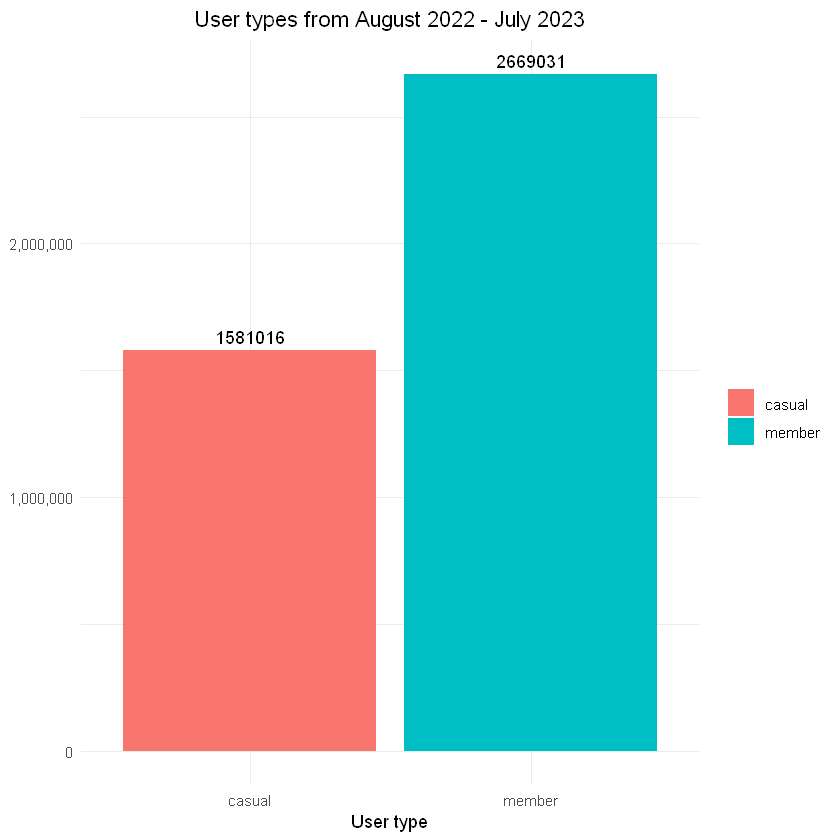

In [33]:

# number of customers by member type from August 2022- July 2023

num_type_user <- ggplot(data=Cyclist_merged, aes(x= member_casual, fill=member_casual))+ geom_bar( )+
  labs(title = "User types from August 2022 - July 2023",x="User type",y=NULL , fill = NULL) +
  theme_minimal() +
  theme(legend.position=NULL)+
  geom_text(stat = "count", aes(label = after_stat(count)), vjust = -0.5)

num_type_user + theme(plot.title = element_text(hjust = 0.5))+
scale_y_continuous(labels = scales::comma) 

- We can observe that the dataset contains a larger number of users that have a membership (1,581,016) compared to casual users (2,669,031)

### 2. User types by readable type

In [ ]:
number_rideable_type <- ggplot(data=Cyclist_merged, aes(x= member_casual, fill=rideable_type))+ geom_bar()+
  labs(title = "User types by readable type from August 2022 - July 2023", x="User type",y=NULL , fill = "Rideable Type") +
  theme_minimal() +
  scale_fill_manual(values = c("classic_bike" = "#0000FF","electric_bike" = "#00FF00"))+
  theme(legend.position="right")+
  scale_y_continuous(labels = scales::comma)

number_rideable_type

- Observing the data, we can see that for casual users, both classic bikes and electric bikes exhibit similar preferences. However, among user members, classic bikes are favored more than electric bikes

### 3. Rents per weekdays according to the User Types 


In [ ]:
ggplot(Cyclist_merged)+
  geom_bar(mapping=aes(x=member_casual, fill= member_casual))+
  facet_wrap(~day_of_week)+
  theme(axis.text.x = element_text(angle=45))+
  labs(title = "Weekdays by User Types", x=NULL,y=NULL , fill = "User Type")


- *the user with membership rent more bycicles than causal user. However, the difference between this type of users is minimal at saturday and also less at sunday* --> correct grammar

### 4. User Types by Weekdays


In [ ]:
ggplot(Cyclist_merged)+
  geom_bar(mapping=aes(x=day_of_week, fill= day_of_week))+
  facet_wrap(~member_casual)+
  theme(axis.text.x = element_text(angle=45))+
  scale_y_continuous(labels = scales::comma)+
  labs(title = " User Types by Weekdays ", x="Day of Week ",y=NULL , fill = "day of week")

- *explain it*

### 5. the mean of the ride length (in minuten) for casual riders and members


In [ ]:
Cyclist_merged %>%
  group_by(member_casual) %>%
  summarise(mean_ride_length_minuten = mean(ride_length)) %>% 
  ggplot()+ geom_col(mapping= aes(x= member_casual, y= mean_ride_length_minuten, fill= member_casual))+
  labs(title = " Mean ride length (in Minutes) by User Types ", x="User Type ",y="Mean ride lenght (in min.)" , fill = "User Type")
  

- *explain*

### 6. the bike type usage by user type

In [ ]:
## excluding docked bikes because only the casual users, rented this kind of bike

bike_type <- Cyclist_merged %>% filter(rideable_type=="classic_bike" | rideable_type=="electric_bike")


#Then lets check the bike type usage by user type:
bike_type %>%
  group_by(rideable_type, member_casual) %>%
  summarise(totals=n(), .groups="drop")  %>%
  ggplot()+
  geom_col(aes(x=rideable_type,y=totals,fill=member_casual), position = "dodge") + 
  labs(title = "User type by Bike Type usage",x="Bike type",y=NULL, fill="User type")  +
  theme_minimal() +
  theme(legend.position="top")



- *explain*

In [ ]:
bike_type%>%
  group_by(member_casual,rideable_type,day_of_week) %>%
  summarise(totals=n(), .groups="drop") %>%
  ggplot() +
  geom_col(aes(x=day_of_week,y=totals, fill=rideable_type), position = "dodge") + 
  facet_wrap(~member_casual) +
  labs(title = "Bike type usage by user type during a week",x="User type",y=NULL, fill="Bike Type") +
  theme_minimal()  +
  scale_fill_manual(values = c("classic_bike" = "#0000FF","electric_bike" = "#00FF00")) +
  theme(legend.position="top")

-*explain it*

## Act: Top three recommendations based on the analysis


- first

- second

- third